In [ ]:
!pip install pubchempy
!pip install rdkit
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install tensorflow
!pip install keras
!pip install matplotlib
!pip install gdown
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 25.0
    Uninstalling packaging-25.0:
      Successfully uninstalled packaging-25.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 2025.12.0 requires packaging>=24.1, but you have packaging 23.2 which is incompatible.
google-cloud-bigquery 3.38.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
db-dtypes 1.4.4 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [ ]:
# ============================
# MASTER CELL – LOAD SEMUA DATASET
# TANPA DOWNLOAD CHEMBL LAGI
# ============================

import pandas as pd
import os
import requests
import gdown # Import gdown for Google Drive downloads

# --------------------------------------------
# 1. BUAT FOLDER LOKAL
# --------------------------------------------
base_path = "/content/source_database_capstone"
os.makedirs(base_path, exist_ok=True)

print(f"Folder siap: {base_path}")

# --------------------------------------------
# 2. DOWNLOAD / LOAD SIDER
# --------------------------------------------
print("\nDownloading SIDER...")

drug_names_url   = "http://sideeffects.embl.de/media/download/drug_names.tsv"
atc_url          = "http://sideeffects.embl.de/media/download/drug_atc.tsv"
indications_url  = "http://sideeffects.embl.de/media/download/meddra_all_indications.tsv.gz"
se_url           = "http://sideeffects.embl.de/media/download/meddra_all_se.tsv.gz"

drug_names  = pd.read_csv(drug_names_url, sep="\t")
drug_atc    = pd.read_csv(atc_url, sep="\t")
indications = pd.read_csv(indications_url, sep="\t", compression="gzip", header=None)
side_effects = pd.read_csv(se_url, sep="\t", compression="gzip", header=None)

drug_names.to_csv(f"{base_path}/SIDER_drug_names.tsv", sep="\t", index=False)
drug_atc.to_csv(f"{base_path}/SIDER_drug_atc.tsv", sep="\t", index=False)
indications.to_csv(f"{base_path}/SIDER_meddra_indications.tsv", sep="\t", index=False)
side_effects.to_csv(f"{base_path}/SIDER_meddra_side_effects.tsv", sep="\t", index=False)

print("✔ SIDER downloaded & saved locally.")

# --------------------------------------------
# 3. DOWNLOAD / LOAD PUBCHEM
# --------------------------------------------
print("\nDownloading PubChem Drug Names...")

pubchem_url = "https://ftp.ncbi.nlm.nih.gov/pubchem/Compound/Extras/Drug-Names.tsv.gz"
pubchem_drugs = pd.read_csv(pubchem_url, sep="\t", compression="gzip")

pubchem_drugs.to_csv(f"{base_path}/PubChem_Drug_Names.tsv", sep="\t", index=False)

print("✔ PubChem saved locally.")

# --------------------------------------------
# 4. DOWNLOAD / LOAD CHEMBL
# --------------------------------------------
print("\nDownloading ChEMBL molecules...")

# Updated Google Drive URL to be handled by gdown
# The file ID is '1zECKtwEAX9izqYocBen4kpWqfbjjhjcl'
chembl_file_id = '1zECKtwEAX9izqYocBen4kpWqfbjjhjcl'
chembl_local_path = f"{base_path}/ChEMBL_molecules_smiles.csv"

try:
    # Use gdown to download the file from Google Drive
    gdown.download(id=chembl_file_id, output=chembl_local_path, quiet=False)
    print(f"✔ ChEMBL downloaded and saved to: {chembl_local_path}")
    chembl = pd.read_csv(chembl_local_path)
    print("✔ ChEMBL loaded successfully.")
except Exception as e:
    print(f"Error downloading ChEMBL using gdown: {e}")
    print("Attempting to load an empty DataFrame for ChEMBL to prevent further errors.")
    chembl = pd.DataFrame(columns=['chembl_id', 'pref_name', 'canonical_smiles'])

# --------------------------------------------
# 5. FINAL SUMMARY
# --------------------------------------------
print("\n======================")
print(" ALL DATASETS LOADED ")
print("======================")
print("Folder :", base_path)
print("SIDER drug names      :", drug_names.shape)
print("SIDER ATC             :", drug_atc.shape)
print("SIDER Indications     :", indications.shape)
print("SIDER Side Effects    :", side_effects.shape)
print("PubChem Drugs         :", pubchem_drugs.shape)
print("ChEMBL Molecules      :", chembl.shape)
print("======================\n")

Folder siap: /content/source_database_capstone

✔ SIDER downloaded & saved locally.

✔ PubChem saved locally.



Downloading...
From (original): https://drive.google.com/uc?id=1zECKtwEAX9izqYocBen4kpWqfbjjhjcl
From (redirected): https://drive.google.com/uc?id=1zECKtwEAX9izqYocBen4kpWqfbjjhjcl&confirm=t&uuid=6eca8a78-b972-4237-8ff1-0671aaaf8e34
To: /content/source_database_capstone/ChEMBL_molecules_smiles.csv
100%|██████████| 236M/236M [00:03<00:00, 62.3MB/s]


✔ ChEMBL downloaded and saved to: /content/source_database_capstone/ChEMBL_molecules_smiles.csv
✔ ChEMBL loaded successfully.

 ALL DATASETS LOADED 
Folder : /content/source_database_capstone
SIDER drug names      : (1429, 2)
SIDER ATC             : (1559, 2)
SIDER Indications     : (30835, 7)
SIDER Side Effects    : (309849, 6)
PubChem Drugs         : (92519, 4)
ChEMBL Molecules      : (2878135, 4)



In [ ]:
# --------------------------------------------
# 6. Lihat 5 data teratas dari masing-masing dataset
# --------------------------------------------
base_path = "/content/source_database_capstone"

# Load semua dataset
drug_names = pd.read_csv(f"{base_path}/SIDER_drug_names.tsv", sep="\t")
drug_atc = pd.read_csv(f"{base_path}/SIDER_drug_atc.tsv", sep="\t")
indications = pd.read_csv(f"{base_path}/SIDER_meddra_indications.tsv", sep="\t", header=None)
side_effects = pd.read_csv(f"{base_path}/SIDER_meddra_side_effects.tsv", sep="\t", header=None)
pubchem_drugs = pd.read_csv(f"{base_path}/PubChem_Drug_Names.tsv", sep="\t")
chembl = pd.read_csv(f"{base_path}/ChEMBL_molecules_smiles.csv")

datasets = {
    "SIDER drug names": drug_names,
    "SIDER ATC": drug_atc,
    "SIDER Indications": indications,
    "SIDER Side Effects": side_effects,
    "PubChem Drugs": pubchem_drugs,
    "ChEMBL molecules": chembl
}

# Tampilkan info kolom dan 5 baris pertama
for name, df in datasets.items():
    print(f"\nDataset: {name}")
    print("Columns:", df.columns.tolist())
    print(df.head())


Dataset: SIDER drug names
Columns: ['CID100000085', 'carnitine']
   CID100000085                 carnitine
0  CID100000119        gamma-aminobutyric
1  CID100000137          5-aminolevulinic
2  CID100000143                leucovorin
3  CID100000146  5-methyltetrahydrofolate
4  CID100000158                      PGE2

Dataset: SIDER ATC
Columns: ['CID100000085', 'A16AA01']
   CID100000085  A16AA01
0  CID100000119  L03AA03
1  CID100000119  N03AG03
2  CID100000137  L01XD04
3  CID100000143  V03AF03
4  CID100000143  V03AF04

Dataset: SIDER Indications
Columns: [0, 1, 2, 3, 4, 5, 6]
              0         1             2                  3    4         5  \
0             0         1             2                  3    4         5   
1  CID100000085  C0015544  text_mention  Failure to Thrive  LLT  C0015544   
2  CID100000085  C0015544  text_mention  Failure to Thrive   PT  C0015544   
3  CID100000085  C0020615  text_mention       Hypoglycemia  LLT  C0020615   
4  CID100000085  C0020615  text

In [ ]:
# ============================
# MASTER DATABASE MERGE
# ============================

# -----------------------------
# 1. LOAD DATASETS
# -----------------------------
print("Loading datasets...")

# SIDER
sider_drug_names = pd.read_csv(f"{base_path}/SIDER_drug_names.tsv", sep="\t")
sider_atc        = pd.read_csv(f"{base_path}/SIDER_drug_atc.tsv", sep="\t")
sider_ind        = pd.read_csv(f"{base_path}/SIDER_meddra_indications.tsv", sep="\t", header=None)
sider_se         = pd.read_csv(f"{base_path}/SIDER_meddra_side_effects.tsv", sep="\t", header=None)

# PubChem
pubchem = pd.read_csv(f"{base_path}/PubChem_Drug_Names.tsv", sep="\t")

# ChEMBL
chembl = pd.read_csv(f"{base_path}/ChEMBL_molecules_smiles.csv")

print("✔ Semua dataset berhasil di-load.\n")

# -----------------------------
# 2. CHECK COLUMNS
# -----------------------------
datasets = {
    "SIDER drug names": sider_drug_names,
    "SIDER ATC": sider_atc,
    "SIDER Indications": sider_ind,
    "SIDER Side Effects": sider_se,
    "PubChem Drugs": pubchem,
    "ChEMBL molecules": chembl
}

for name, df in datasets.items():
    print(f"Dataset: {name}")
    print("Columns:", df.columns.tolist())
    print(df.head(3), "\n")

# -----------------------------
# 3. CLEAN NAMES FOR MAPPING
# -----------------------------
def clean_name(name):
    if pd.isna(name):
        return ""
    return str(name).strip().lower()

# SIDER
sider_drug_names['drug_clean'] = sider_drug_names.iloc[:,1].apply(clean_name)
# PubChem
pubchem['drug_clean'] = pubchem['Drug_name'].apply(clean_name)
# ChEMBL
chembl['drug_clean'] = chembl['pref_name'].apply(clean_name)

# -----------------------------
# 4. MERGE DATASETS
# -----------------------------
# Merge SIDER drug names + ATC
sider = sider_drug_names.merge(sider_atc, on=sider_atc.columns[0], how='left')

# Merge with PubChem
sider_pubchem = sider.merge(pubchem[['drug_clean','PubChem_CID']],
                            left_on='drug_clean', right_on='drug_clean', how='left')

# Merge with ChEMBL
master = sider_pubchem.merge(chembl[['drug_clean','chembl_id','canonical_smiles']],
                             on='drug_clean', how='left')

# -----------------------------
# 5. ADD INDICATIONS & SIDE EFFECTS
# -----------------------------
# SIDER Indications: columns 0 = CID, 6 = Indication
sider_ind = sider_ind.rename(columns={0:'CID',6:'Indication'})
indications = sider_ind.groupby('CID')['Indication'].apply(lambda x: '; '.join(x)).reset_index()

master = master.merge(indications, left_on=sider.columns[0], right_on='CID', how='left')

# SIDER Side Effects: columns 0 = CID, 5 = Side Effect
sider_se = sider_se.rename(columns={0:'CID',5:'Side_Effect'})
side_effects = sider_se.groupby('CID')['Side_Effect'].apply(lambda x: '; '.join(x)).reset_index()

master = master.merge(side_effects, left_on=sider.columns[0], right_on='CID', how='left')

# -----------------------------
# 6. SAVE MASTER DATABASE
# -----------------------------
master_csv_path = f"{base_path}/master_drug_database.csv"
master.to_csv(master_csv_path, index=False)
print(f"✔ Master database saved: {master_csv_path}\n")

# -----------------------------
# 7. SHOW SAMPLE
# -----------------------------
print("5 rows from master database:")
display(master.head())

Loading datasets...
✔ Semua dataset berhasil di-load.

Dataset: SIDER drug names
Columns: ['CID100000085', 'carnitine']
   CID100000085           carnitine
0  CID100000119  gamma-aminobutyric
1  CID100000137    5-aminolevulinic
2  CID100000143          leucovorin 

Dataset: SIDER ATC
Columns: ['CID100000085', 'A16AA01']
   CID100000085  A16AA01
0  CID100000119  L03AA03
1  CID100000119  N03AG03
2  CID100000137  L01XD04 

Dataset: SIDER Indications
Columns: [0, 1, 2, 3, 4, 5, 6]
              0         1             2                  3    4         5  \
0             0         1             2                  3    4         5   
1  CID100000085  C0015544  text_mention  Failure to Thrive  LLT  C0015544   
2  CID100000085  C0015544  text_mention  Failure to Thrive   PT  C0015544   

                   6  
0                  6  
1  Failure to thrive  
2  Failure to thrive   

Dataset: SIDER Side Effects
Columns: [0, 1, 2, 3, 4, 5]
              0             1         2    3         4     

,CID100000085,carnitine,drug_clean,A16AA01,PubChem_CID,chembl_id,canonical_smiles,CID_x,Indication,CID_y,Side_Effect
0,CID100000119,gamma-aminobutyric,gamma-aminobutyric,L03AA03,NaN,NaN,NaN,CID100000119,Agammaglobulinemia; Hypogammaglobulinaemia; Va...,CID100000119,Anaphylactic shock; Anaphylactic shock; Angioe...
1,CID100000119,gamma-aminobutyric,gamma-aminobutyric,N03AG03,NaN,NaN,NaN,CID100000119,Agammaglobulinemia; Hypogammaglobulinaemia; Va...,CID100000119,Anaphylactic shock; Anaphylactic shock; Angioe...
2,CID100000137,5-aminolevulinic,5-aminolevulinic,L01XD04,NaN,NaN,NaN,CID100000137,Actinic keratosis; Actinic keratosis; Seborrho...,CID100000137,Anaemia; Anaemia; Aphasia; Aphasia; Mental dis...
3,CID100000143,leucovorin,leucovorin,V03AF03,135403648.0,CHEMBL1679,Nc1nc(=O)c2c([nH]1)NCC(CNc1ccc(C(=O)N[C@@H](CC...,CID100000143,Anaemia; Anaemia; Anaemia megaloblastic; Anaem...,CID100000143,Alopecia; Alopecia; Anorexia; Decreased appeti...
4,CID100000143,leucovorin,leucovorin,V03AF03,135403648.0,CHEMBL1679,Nc1nc(=O)c2c([nH]1)NCC(CNc1ccc(C(=O)N[C@@H](CC...,CID100000143,Anaemia; Anaemia; Anaemia megaloblastic; Anaem...,CID100000143,Alopecia; Alopecia; Anorexia; Decreased appeti...


In [ ]:
import pandas as pd

# --------------------------------------------
# 1. Load master database hasil merge sebelumnya
# --------------------------------------------
master_path = "/content/source_database_capstone/master_drug_database.csv"
master = pd.read_csv(master_path)

# --------------------------------------------
# 2. Bersihkan kolom duplikat dan rename
# --------------------------------------------
master = master.rename(columns={
    'CID100000085': 'SIDER_CID',
    'carnitine': 'SIDER_name',
    'A16AA01': 'ATC_code'
})

# Hapus kolom duplikat CID_x dan CID_y
cols_to_drop = ['CID_x', 'CID_y']
for c in cols_to_drop:
    if c in master.columns:
        master = master.drop(columns=c)

# --------------------------------------------
# 3. Normalisasi nama obat
# --------------------------------------------
# Lowercase + strip spasi
master['drug_clean'] = master['drug_clean'].str.lower().str.strip()

# --------------------------------------------
# 4. Gabungkan indikasi & side effect menjadi string unik
# --------------------------------------------
# Jika Indication/Side_Effect adalah list-like string, pisahkan dulu
def clean_text_column(col):
    if col.dtype == object:
        return col.fillna('').astype(str)
    else:
        return col.fillna('')

master['Indication'] = clean_text_column(master['Indication'])
master['Side_Effect'] = clean_text_column(master['Side_Effect'])

# --------------------------------------------
# 5. Hitung jumlah unik obat setelah normalisasi
# --------------------------------------------
num_unique_drugs = master['drug_clean'].nunique()
print(f"Jumlah obat unik setelah normalisasi: {num_unique_drugs}")

# --------------------------------------------
# 6. Simpan master database final
# --------------------------------------------
final_path = "/content/source_database_capstone/master_drug_database_final.csv"
master.to_csv(final_path, index=False)
print(f"✔ Master database final tersimpan di: {final_path}")

# --------------------------------------------
# 7. Tampilkan 5 data pertama
# --------------------------------------------
master.head()

Jumlah obat unik setelah normalisasi: 1343
✔ Master database final tersimpan di: /content/source_database_capstone/master_drug_database_final.csv


,SIDER_CID,SIDER_name,drug_clean,ATC_code,PubChem_CID,chembl_id,canonical_smiles,Indication,Side_Effect
0,CID100000119,gamma-aminobutyric,gamma-aminobutyric,L03AA03,NaN,NaN,NaN,Agammaglobulinemia; Hypogammaglobulinaemia; Va...,Anaphylactic shock; Anaphylactic shock; Angioe...
1,CID100000119,gamma-aminobutyric,gamma-aminobutyric,N03AG03,NaN,NaN,NaN,Agammaglobulinemia; Hypogammaglobulinaemia; Va...,Anaphylactic shock; Anaphylactic shock; Angioe...
2,CID100000137,5-aminolevulinic,5-aminolevulinic,L01XD04,NaN,NaN,NaN,Actinic keratosis; Actinic keratosis; Seborrho...,Anaemia; Anaemia; Aphasia; Aphasia; Mental dis...
3,CID100000143,leucovorin,leucovorin,V03AF03,135403648.0,CHEMBL1679,Nc1nc(=O)c2c([nH]1)NCC(CNc1ccc(C(=O)N[C@@H](CC...,Anaemia; Anaemia; Anaemia megaloblastic; Anaem...,Alopecia; Alopecia; Anorexia; Decreased appeti...
4,CID100000143,leucovorin,leucovorin,V03AF03,135403648.0,CHEMBL1679,Nc1nc(=O)c2c([nH]1)NCC(CNc1ccc(C(=O)N[C@@H](CC...,Anaemia; Anaemia; Anaemia megaloblastic; Anaem...,Alopecia; Alopecia; Anorexia; Decreased appeti...


In [ ]:
import pandas as pd

# Load master database final
master_db_path = "/content/source_database_capstone/master_drug_database_final.csv"
master_df = pd.read_csv(master_db_path)

# Total baris sebelum normalisasi (asumsi kolom drug_clean sudah ada)
total_rows = master_df.shape[0]

# Jumlah obat unik setelah normalisasi
unique_drugs = master_df['drug_clean'].nunique()

# Hitung jumlah baris per obat (overlap)
rows_per_drug = master_df.groupby('drug_clean').size().sort_values(ascending=False)

print("===== Statistik Master Database =====")
print(f"Total baris di master DB       : {total_rows}")
print(f"Jumlah obat unik (drug_clean) : {unique_drugs}")
print("\nContoh beberapa obat dengan baris terbanyak (overlap):")
print(rows_per_drug.head(10))

===== Statistik Master Database =====
Total baris di master DB       : 30399
Jumlah obat unik (drug_clean) : 1343

Contoh beberapa obat dengan baris terbanyak (overlap):
drug_clean
dexamethasone      1518
prednisolone        600
lidocaine           294
chloramphenicol     280
estradiol           272
erythromycin        260
mannitol            259
metronidazole       240
neomycin            228
sodium              208
dtype: int64


In [ ]:
import pandas as pd

# Load master database yang sudah ada
master_db = pd.read_csv("/content/source_database_capstone/master_drug_database_final.csv")

# Group by drug_clean untuk menghilangkan overlap
master_db_unique = master_db.groupby('drug_clean').agg({
    'SIDER_CID': lambda x: ';'.join(x.dropna().unique()),
    'SIDER_name': lambda x: ';'.join(x.dropna().unique()),
    'ATC_code': lambda x: ';'.join(x.dropna().unique()),
    'PubChem_CID': lambda x: ';'.join(x.dropna().astype(str).unique()),
    'chembl_id': lambda x: ';'.join(x.dropna().unique()),
    'canonical_smiles': lambda x: ';'.join(x.dropna().unique()),
    'Indication': lambda x: ';'.join(x.dropna().unique()),
    'Side_Effect': lambda x: ';'.join(x.dropna().unique())
}).reset_index()

# Simpan hasil final
master_db_unique.to_csv("/content/source_database_capstone/master_drug_database_unique.csv", index=False)

# Statistik
print("Jumlah obat unik setelah hilangkan overlap:", master_db_unique.shape[0])

Jumlah obat unik setelah hilangkan overlap: 1343


In [ ]:
import pandas as pd

# Load master database final
master_db_path = "/content/source_database_capstone/master_drug_database_final.csv"
df = pd.read_csv(master_db_path)

# Fungsi untuk menentukan kelas obat
def assign_class(indication_text):
    if pd.isna(indication_text):
        return "Lainnya"

    text = indication_text.lower()
    if "headache" in text:
        return "Sakit Kepala"
    elif "flu" in text or "influenza" in text:
        return "Sakit Flu"
    elif "cough" in text:
        return "Sakit Batuk"
    else:
        return "Lainnya"

# Terapkan fungsi ke kolom baru 'Drug_Class'
df["Drug_Class"] = df["Indication"].apply(assign_class)

# Cek distribusi kelas
print("Distribusi kelas obat:")
print(df["Drug_Class"].value_counts())

# Simpan kembali ke CSV
df.to_csv("/content/source_database_capstone/master_drug_database_with_class.csv", index=False)
print("✔ Database dengan kelas obat tersimpan di master_drug_database_with_class.csv")

Distribusi kelas obat:
Drug_Class
Lainnya         25978
Sakit Flu        2141
Sakit Kepala     1714
Sakit Batuk       566
Name: count, dtype: int64
✔ Database dengan kelas obat tersimpan di master_drug_database_with_class.csv


In [ ]:
# Filter hanya untuk 3 kelas utama
df_3kelas = df[df["Drug_Class"].isin(["Sakit Kepala", "Sakit Flu", "Sakit Batuk"])].copy()

# Cek jumlah total baris dan obat unik per kelas
print("Jumlah baris dataset (3 kelas):", len(df_3kelas))
print("Jumlah obat unik per kelas:")
print(df_3kelas.groupby("Drug_Class")["drug_clean"].nunique())

# Cek kelas unik
print("Kelas unik yang digunakan:", df_3kelas["Drug_Class"].unique())

# Simpan ke CSV baru jika perlu
df_3kelas.to_csv("/content/source_database_capstone/master_drug_database_3kelas.csv", index=False)
print("✔ Dataset 3 kelas tersimpan di master_drug_database_3kelas.csv")

Jumlah baris dataset (3 kelas): 4421
Jumlah obat unik per kelas:
Drug_Class
Sakit Batuk     17
Sakit Flu       67
Sakit Kepala    46
Name: drug_clean, dtype: int64
Kelas unik yang digunakan: ['Sakit Flu' 'Sakit Kepala' 'Sakit Batuk']
✔ Dataset 3 kelas tersimpan di master_drug_database_3kelas.csv


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# ===== Load dataset 3 kelas =====
df = pd.read_csv("/content/source_database_capstone/master_drug_database_3kelas.csv")

# ===== Pastikan kelas hanya 3 kelas fokus =====
df = df[df['Drug_Class'].isin(['Sakit Kepala', 'Sakit Flu', 'Sakit Batuk'])]

# ===== Split train 60% / temp 40% =====
df_train, df_temp = train_test_split(
    df,
    test_size=0.4,
    stratify=df['Drug_Class'],
    random_state=42
)

# ===== Split temp 50%/50% → validation 20%, test 20% =====
df_val, df_test = train_test_split(
    df_temp,
    test_size=0.5,
    stratify=df_temp['Drug_Class'],
    random_state=42
)

# ===== Cek jumlah baris & distribusi =====
print("Jumlah baris:")
print(f"Train      : {len(df_train)}")
print(f"Validation : {len(df_val)}")
print(f"Test       : {len(df_test)}\n")

print("Distribusi kelas di Train:")
print(df_train['Drug_Class'].value_counts())
print("\nDistribusi kelas di Validation:")
print(df_val['Drug_Class'].value_counts())
print("\nDistribusi kelas di Test:")
print(df_test['Drug_Class'].value_counts())

# ===== Simpan dataset split =====
df_train.to_csv("/content/source_database_capstone/master_train.csv", index=False)
df_val.to_csv("/content/source_database_capstone/master_val.csv", index=False)
df_test.to_csv("/content/source_database_capstone/master_test.csv", index=False)

print("\n✔ Dataset train/val/test berhasil dibuat dan disimpan.")

Jumlah baris:
Train      : 2652
Validation : 884
Test       : 885

Distribusi kelas di Train:
Drug_Class
Sakit Flu       1284
Sakit Kepala    1028
Sakit Batuk      340
Name: count, dtype: int64

Distribusi kelas di Validation:
Drug_Class
Sakit Flu       428
Sakit Kepala    343
Sakit Batuk     113
Name: count, dtype: int64

Distribusi kelas di Test:
Drug_Class
Sakit Flu       429
Sakit Kepala    343
Sakit Batuk     113
Name: count, dtype: int64

✔ Dataset train/val/test berhasil dibuat dan disimpan.


In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import numpy as np

# ===== Load dataset train/val/test =====
train_df = pd.read_csv("/content/source_database_capstone/master_train.csv")
val_df   = pd.read_csv("/content/source_database_capstone/master_val.csv")
test_df  = pd.read_csv("/content/source_database_capstone/master_test.csv")

# ===== Ambil SMILES dan kelas =====
X_train_smiles = train_df['canonical_smiles'].astype(str).tolist()
X_val_smiles   = val_df['canonical_smiles'].astype(str).tolist()
X_test_smiles  = test_df['canonical_smiles'].astype(str).tolist()

y_train = train_df['Drug_Class'].values
y_val   = val_df['Drug_Class'].values
y_test  = test_df['Drug_Class'].values

# ===== Buat kamus karakter SMILES =====
all_chars = sorted(list(set(''.join(X_train_smiles + X_val_smiles + X_test_smiles))))
char_to_int = {c:i+1 for i,c in enumerate(all_chars)}  # start from 1, 0 for padding
int_to_char = {i:c for c,i in char_to_int.items()}

# ===== Encode SMILES jadi integer sequence =====
def encode_smiles(smiles_list, char_to_int):
    return [[char_to_int[c] for c in s] for s in smiles_list]

X_train_enc = encode_smiles(X_train_smiles, char_to_int)
X_val_enc   = encode_smiles(X_val_smiles, char_to_int)
X_test_enc  = encode_smiles(X_test_smiles, char_to_int)

# ===== Padding sequence agar panjang sama =====
max_len = max(max(len(s) for s in X_train_enc),
              max(len(s) for s in X_val_enc),
              max(len(s) for s in X_test_enc))

X_train_pad = pad_sequences(X_train_enc, maxlen=max_len, padding='post')
X_val_pad   = pad_sequences(X_val_enc, maxlen=max_len, padding='post')
X_test_pad  = pad_sequences(X_test_enc, maxlen=max_len, padding='post')

# ===== Encode kelas ke integer =====
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_val_enc   = label_encoder.transform(y_val)
y_test_enc  = label_encoder.transform(y_test)

# ===== Output bentuk dataset siap CNN =====
print("X_train_pad shape:", X_train_pad.shape)
print("y_train_enc shape:", y_train_enc.shape)
print("Contoh encoding SMILES pertama:")
print(X_train_pad[0])
print("Contoh label:", y_train_enc[0])

X_train_pad shape: (2652, 173)
y_train_enc shape: (2652,)
Contoh encoding SMILES pertama:
[21 13 16  8 16 16  9  2 16 16 16 16  9  3 16 16  2 13 21  3 20  8 16 16
 16 16 20  8 16 16 20  2 28  9 30 28 28 28 30  9  3 16 16  8  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0]
Contoh label: 1


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# ===== Parameter =====
vocab_size = len(char_to_int) + 1   # +1 untuk padding
embedding_dim = 128
input_length = X_train_pad.shape[1]
num_classes = 3

# ===== Arsitektur CNN 1D =====
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length),

    Conv1D(filters=64, kernel_size=7, activation='relu', padding='same'),
    MaxPooling1D(pool_size=3),

    Conv1D(filters=128, kernel_size=5, activation='relu', padding='same'),
    MaxPooling1D(pool_size=3),

    Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'),
    GlobalMaxPooling1D(),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
])

# ===== Compile model =====
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# ===== Callbacks =====
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_cnn_smiles.h5', monitor='val_loss', save_best_only=True)
]

# ===== Train model =====
history = model.fit(
    X_train_pad, y_train_enc,
    validation_data=(X_val_pad, y_val_enc),
    epochs=50,
    batch_size=64,
    callbacks=callbacks
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.5451 - loss: 0.9511

42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 174ms/step - accuracy: 0.5468 - loss: 0.9486 - val_accuracy: 0.8281 - val_loss: 0.4495
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.8692 - loss: 0.3285

42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 169ms/step - accuracy: 0.8702 - loss: 0.3264 - val_accuracy: 0.9638 - val_loss: 0.0858
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.9561 - loss: 0.0929

42/42 ━━━━━━━━━━━━━━━━━━━━ 12s 207ms/step - accuracy: 0.9562 - loss: 0.0926 - val_accuracy: 0.9400 - val_loss: 0.0748
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.9502 - loss: 0.0770

42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 207ms/step - accuracy: 0.9504 - loss: 0.0768 - val_accuracy: 0.9649 - val_loss: 0.0695
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 184ms/step - accuracy: 0.9622 - loss: 0.0712 - val_accuracy: 0.9400 - val_loss: 0.0900
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 231ms/step - accuracy: 0.9522 - loss: 0.0703 - val_accuracy: 0.9400 - val_loss: 0.0742
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.9595 - loss: 0.0681

42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 182ms/step - accuracy: 0.9596 - loss: 0.0680 - val_accuracy: 0.9649 - val_loss: 0.0686
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 189ms/step - accuracy: 0.9623 - loss: 0.0562 - val_accuracy: 0.9400 - val_loss: 0.0808
Epoch 9/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 202ms/step - accuracy: 0.9533 - loss: 0.0680 - val_accuracy: 0.9400 - val_loss: 0.0758
Epoch 10/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.9541 - loss: 0.0719

42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 165ms/step - accuracy: 0.9542 - loss: 0.0717 - val_accuracy: 0.9649 - val_loss: 0.0678
Epoch 11/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 209ms/step - accuracy: 0.9586 - loss: 0.0627 - val_accuracy: 0.9649 - val_loss: 0.0689
Epoch 12/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 164ms/step - accuracy: 0.9596 - loss: 0.0583 - val_accuracy: 0.9400 - val_loss: 0.0740
Epoch 13/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 209ms/step - accuracy: 0.9594 - loss: 0.0578 - val_accuracy: 0.9649 - val_loss: 0.0697
Epoch 14/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 172ms/step - accuracy: 0.9598 - loss: 0.0609 - val_accuracy: 0.9400 - val_loss: 0.0725
Epoch 15/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 194ms/step - accuracy: 0.9601 - loss: 0.0615 - val_accuracy: 0.9400 - val_loss: 0.0716


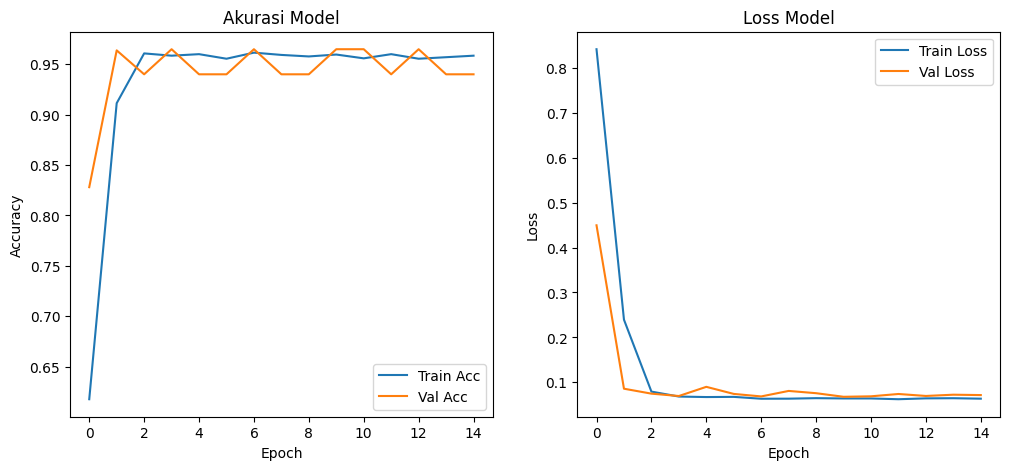

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Plot akurasi
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


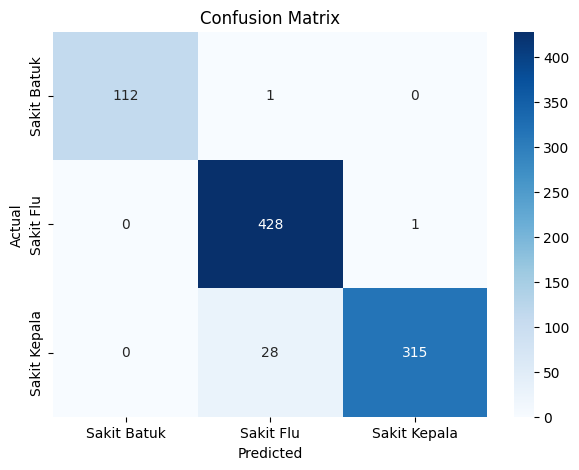

===== Classification Report =====
              precision    recall  f1-score   support

 Sakit Batuk       1.00      0.99      1.00       113
   Sakit Flu       0.94      1.00      0.97       429
Sakit Kepala       1.00      0.92      0.96       343

    accuracy                           0.97       885
   macro avg       0.98      0.97      0.97       885
weighted avg       0.97      0.97      0.97       885



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt # Ensure plt is imported for plotting

# ===== Prediksi kelas =====
y_pred_prob = model.predict(X_test_pad) # Use X_test_pad instead of X_test
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = y_test_enc # Use y_test_enc for true labels

# ===== Confusion Matrix =====
cm = confusion_matrix(y_true, y_pred)

# Get class names from the LabelEncoder for proper labeling
classes = label_encoder.classes_.tolist()

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ===== Classification Report =====
report = classification_report(y_true, y_pred, target_names=classes)
print("===== Classification Report =====")
print(report)

In [ ]:
test_loss, test_acc = model.evaluate(X_test_pad, y_test_enc, verbose=1)
print(f"Akurasi Test Set: {test_acc*100:.2f}%")
print(f"Loss Test Set  : {test_loss:.4f}")

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9673 - loss: 0.0583
Akurasi Test Set: 96.61%
Loss Test Set  : 0.0667


In [ ]:
import tensorflow as tf
import tensorflowjs as tfjs
import os
import numpy as np

submission_dir = "capstone"
os.makedirs(submission_dir, exist_ok=True)

In [ ]:
import tensorflow as tf
import os

# Load the best model from the h5 file
model = tf.keras.models.load_model('best_cnn_smiles.h5')

saved_model_dir = os.path.join(submission_dir, "saved_model.keras")
model.save(saved_model_dir)
print(f"SavedModel disimpan di: {saved_model_dir}")

SavedModel disimpan di: capstone/saved_model.keras


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

tflite_dir = os.path.join(submission_dir, "tflite")
os.makedirs(tflite_dir, exist_ok=True)

tflite_model_path = os.path.join(tflite_dir, "model.tflite")

# Define a directory for the TensorFlow SavedModel format
saved_model_tf_format_dir = os.path.join(submission_dir, "saved_model_tf")
os.makedirs(saved_model_tf_format_dir, exist_ok=True)

# Export the trained Keras model to TensorFlow SavedModel format (directory)
# This is necessary because tf.lite.TFLiteConverter.from_saved_model expects a SavedModel directory.
model.export(saved_model_tf_format_dir)

# Konversi ke TFLite
# Use the newly created SavedModel directory
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_tf_format_dir)
tflite_model = converter.convert()

# Simpan file .tflite
with open(tflite_model_path, "wb") as f:
    f.write(tflite_model)

# Re-load training data to ensure label_encoder is correctly fitted
train_df = pd.read_csv("/content/source_database_capstone/master_train.csv")
y_train = train_df['Drug_Class'].values

# Ensure label_encoder is correctly initialized and fitted
label_encoder = LabelEncoder()
label_encoder.fit(y_train) # Fit the encoder with the training labels

# Simpan label.txt (opsional tapi disarankan)
jumlah_kelas = len(label_encoder.classes_)
label_path = os.path.join(tflite_dir, "label.txt")
with open(label_path, "w") as f:
    for i in range(jumlah_kelas):
        f.write(f"{label_encoder.classes_[i]}\n") # Write actual class names

print(f"TF-Lite model dan label disimpan di: {tflite_dir}")

Saved artifact at 'capstone/saved_model_tf'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 173), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  136303536219984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136303536219600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136303536220752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136303536220560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136303536221520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136303536219792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136303536222096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136303536220368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136303536222864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136303536223440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136303536223632:

In [ ]:
tfjs_dir = os.path.join(submission_dir, "tfjs_model")
tfjs.converters.save_keras_model(model, tfjs_dir)
print(f"TFJS model disimpan di: {tfjs_dir}")

failed to lookup keras version from the file,
    this is likely a weight only file
TFJS model disimpan di: capstone/tfjs_model


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


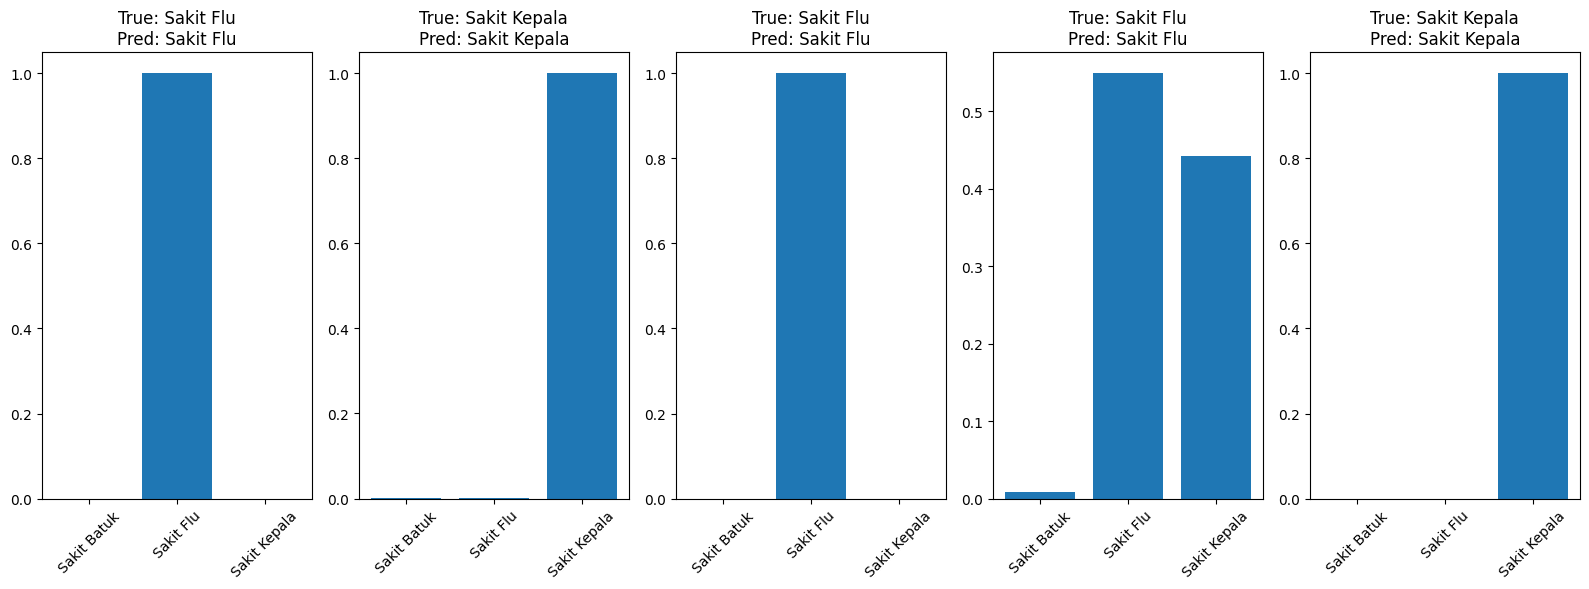

In [ ]:
import matplotlib.pyplot as plt

num_display = 5
indices = np.random.choice(len(X_test_pad), num_display, replace=False)

sample_x = X_test_pad[indices]
sample_y = y_test_enc[indices]
sample_smiles = test_df.iloc[indices]['canonical_smiles'].values
sample_true_labels = label_encoder.inverse_transform(sample_y)

pred_probs = model.predict(sample_x)
pred_labels = np.argmax(pred_probs, axis=1)
pred_class_names = label_encoder.inverse_transform(pred_labels)

plt.figure(figsize=(16, 6))

for i in range(num_display):
    plt.subplot(1, num_display, i+1)
    plt.bar(label_encoder.classes_, pred_probs[i])
    plt.xticks(rotation=45)
    plt.title(f"True: {sample_true_labels[i]}\nPred: {pred_class_names[i]}")
    plt.tight_layout()

plt.show()

In [ ]:
import shutil
from google.colab import files
import os

# Define the directory to be zipped
directory_to_zip = "/content/capstone"

# Define the output zip file name
zip_file_name = "capstone.zip"

# Create the zip archive
print(f"Creating zip archive of {directory_to_zip}...")
shutil.make_archive(os.path.splitext(zip_file_name)[0], 'zip', directory_to_zip)
print(f"Archive '{zip_file_name}' created.")

# Download the zip file to local machine
print("Downloading the zip file...")
files.download(zip_file_name)
print("Download initiated. Check your browser's download for 'capstone.zip'.")

Creating zip archive of /content/capstone...
Archive 'capstone.zip' created.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download initiated. Check your browser's download for 'capstone.zip'.


Top 5 Molecular Structures:


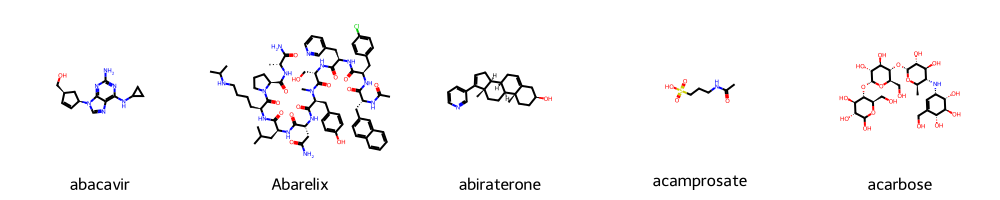

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage
from IPython.display import Image, display

# Load the unique master drug database
master_unique_path = "/content/source_database_capstone/master_drug_database_unique.csv"
df_unique = pd.read_csv(master_unique_path)

# Filter out rows where canonical_smiles is NaN or empty
df_unique_valid_smiles = df_unique.dropna(subset=['canonical_smiles'])
df_unique_valid_smiles = df_unique_valid_smiles[df_unique_valid_smiles['canonical_smiles'] != '']

# Get the first 5 unique SMILES for visualization
# We'll take the first 5 unique entries in case some SMILES are identical or very similar
sample_smiles = df_unique_valid_smiles['canonical_smiles'].head(5).tolist()
sample_names = df_unique_valid_smiles['SIDER_name'].head(5).tolist()

mols = []
valid_names = []
for i, smiles in enumerate(sample_smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            mols.append(mol)
            valid_names.append(sample_names[i])
        else:
            print(f"Could not convert SMILES: {smiles} for {sample_names[i]}")
    except Exception as e:
        print(f"Error processing SMILES {smiles} for {sample_names[i]}: {e}")


if len(mols) > 0:
    img = MolsToGridImage(mols, molsPerRow=5, subImgSize=(200, 200), legends=valid_names)
    print("Top 5 Molecular Structures:")
    display(img)
else:
    print("No valid molecules found to display.")

In [ ]:
import numpy as np

def predict_drug_class(smiles_input):
    # 1. Encode SMILES input
    encoded_smiles = [[char_to_int[c] for c in smiles_input if c in char_to_int]]

    # 2. Pad sequence
    padded_smiles = pad_sequences(encoded_smiles, maxlen=max_len, padding='post')

    # 3. Make prediction
    prediction_probabilities = model.predict(padded_smiles)
    predicted_label = np.argmax(prediction_probabilities, axis=1)
    predicted_class_name = label_encoder.inverse_transform(predicted_label)[0]

    return predicted_class_name, prediction_probabilities[0]

# Main interaction loop
print("Masukkan string SMILES untuk memprediksi kelas obatnya (ketik 'exit' untuk keluar):\n")
while True:
    user_smiles = input("SMILES: ")
    if user_smiles.lower() == 'exit':
        break

    if not user_smiles:
        print("Input SMILES tidak boleh kosong. Silakan coba lagi.")
        continue

    predicted_class, probabilities = predict_drug_class(user_smiles)

    print(f"\nPrediksi Kelas Obat: {predicted_class}")
    print("Probabilitas:")
    for i, class_name in enumerate(label_encoder.classes_):
        print(f"  {class_name}: {probabilities[i]*100:.2f}%")
    print("\n" + "="*30 + "\n")

Masukkan string SMILES untuk memprediksi kelas obatnya (ketik 'exit' untuk keluar):

SMILES: Pseudoefedrin HCl
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

Prediksi Kelas Obat: Sakit Flu
Probabilitas:
  Sakit Batuk: 0.70%
  Sakit Flu: 58.52%
  Sakit Kepala: 40.77%


SMILES: exit


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [ ]:
# Jalankan ini di Colab!
# Ganti 'vectorize_layer' dengan nama variabel layer Anda
vocabint = char_to_int
vocabchar = all_chars

print("Daftar Vocab Integer:", vocabint)
print("Daftar Vocab Char:", vocabchar)
# Hasilnya akan seperti: ['', '[UNK]', 'e', 'a', 'n', 'i', ...]

Daftar Vocab Integer: {'#': 1, '(': 2, ')': 3, '+': 4, '-': 5, '.': 6, '/': 7, '1': 8, '2': 9, '3': 10, '4': 11, '5': 12, '=': 13, '@': 14, 'B': 15, 'C': 16, 'F': 17, 'H': 18, 'I': 19, 'N': 20, 'O': 21, 'P': 22, 'S': 23, '[': 24, '\\': 25, ']': 26, 'a': 27, 'c': 28, 'l': 29, 'n': 30, 'o': 31, 'r': 32, 's': 33}
Daftar Vocab Char: ['#', '(', ')', '+', '-', '.', '/', '1', '2', '3', '4', '5', '=', '@', 'B', 'C', 'F', 'H', 'I', 'N', 'O', 'P', 'S', '[', '\\', ']', 'a', 'c', 'l', 'n', 'o', 'r', 's']
